Домашка. Теоретический вопросы.

1. Приведите по 2 примера, когда лучше максимизировать Precision, а когда Recall.

Precision (точность): используется, когда важно не ошибиться при обнаружении искомых объектов. Примеры: `1- обнаружение магазинных воришек` (важно не только найти воришек, но и не обвинить невиновных) или `2- диагностика тяжелых, но трудно диагностируемых заболеваний`.
Т.е. мы должны быть уверенны, когда относим что-то к искомому классу.

Recall (полнота): использутеся, когда нам важно найти максимальное количество объектов искомого класса. Примеры: `1- обнаружение нарушителей на КПП важного объекта` или `2- обнаружение террористов`. 
Т.е. можно позволить себе ошибаться, главное - не пропустить виновных.

2. Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?

`F-мера это гармоническое среднее. Т.е. по сути это тоже среднее, но с возможностью регулировать величину значения вкладв в этот показатель Точности и Посноты при такой необходимости. `

# Курсовой проект по курсу: Библиотеки Python для Data Science. Продоолжение
### версия 1



**Задачи в работа:**

* кол-во пропусков Annual Income = кол-ву пропусков Credit Default. `возможно это что-то значит?`
* Number of open accounts - большой хвост справа в распределении `подумать на этим...`
* у Months since last deliquent много пропусков. `Что с ними делать?`
* какие алгоритмы кроме `LogisticRegression` использовать?
* ...

# Оглавление <a name='index'>

 Загрузка
 
 [Пропуски](#nulls)

* **[Home Ownership](#1_hw)** - домовладение
* **[Annual Income](#2_ai)** - годовой доход (`1557 пропусков`)
* **[Years in current job](#3_yicj)** - количество лет на текущем месте работы (`371 пропуск`)
* **[Tax Liens](#4_tl)** - налоговые обременения
* **[Number of Open Accounts](#5_nooa)** - количество открытых счетов
* **[Years of Credit History](#6_yoch)** - количество лет кредитной истории
* **[Maximum Open Credit](#7_moc)** - наибольший открытый кредит
* **[Number of Credit Problems](#8_nocp)** - количество проблем с кредитом
* **[Months since last delinquent](#9_msld)** - количество месяцев с последней просрочки платежа (`4071 пропуск`)
* **[Bankruptcies](#10_b)** - банкротства (`14 пропусков`)
* **[Purpose](#11_p)** - цель кредита
* **[Term](#12_t)** - срок кредита
* **[Current Loan Amount](#13_cla)** - текущая сумма кредита
* **[Current Credit Balance](#14_ccb)** - текущий кредитный баланс
* **[Monthly Debt](#15_md)** - ежемесячный долг
* **[Credit Default](#16_cd)** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка) (`1557 пропуско`)

# Загрузка

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('course_project_train.csv')
df_test = pd.read_csv('course_project_test.csv')

# Обзор данных

In [4]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df.shape

(7500, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### тестовый датасет

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


In [9]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [10]:
for cat_colname in df.select_dtypes(include = 'object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### Пропуски <a name="nulls"></a>

[к оглавлению](#index)

In [11]:
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

# Обработка данных

### Home Ownership - домовладение <a name="1_hw"></a>

`делаем dummies-переменные`

[к оглавлению](#index)

In [12]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

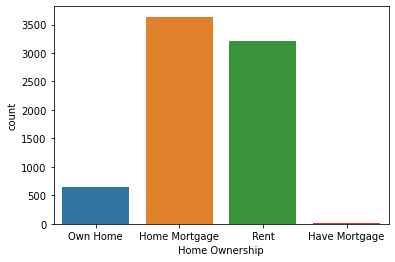

In [13]:
sns.countplot(x="Home Ownership", data=df)
plt.show()

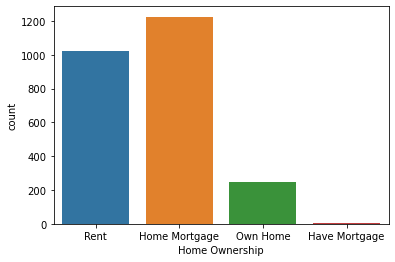

In [14]:
sns.countplot(x="Home Ownership", data=df_test)
plt.show()

In [15]:
df = pd.concat([df, pd.get_dummies(df['Home Ownership'], prefix='Home Ownership')], axis=1)

# не забыть сделать тоже на ТЕСТЕ
df_test = pd.concat([df_test, pd.get_dummies(df_test['Home Ownership'], prefix='Home Ownership')], axis=1)

### Annual Income - годовой доход <a name="2_ai"></a>

`делим на 6 частей по уровню дохода (пропуски решил выделить в отдельную группу, потому-что их много)`

[к оглавлению](#index)

In [16]:
df['Annual Income'].value_counts()

1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64

In [17]:
df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

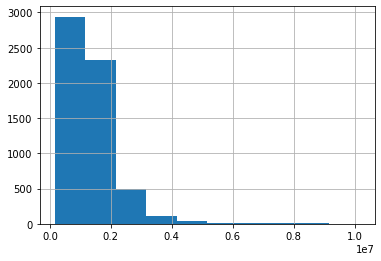

In [18]:
df['Annual Income'].hist()

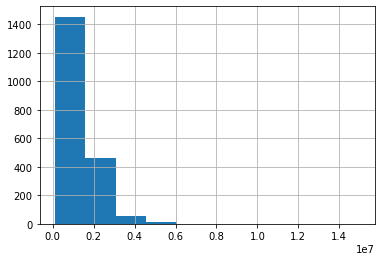

In [19]:
df_test['Annual Income'].hist()

In [20]:
df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [21]:
df.loc[(df['Annual Income'] < 800000), 'Annual Income'] = 1
df.loc[(df['Annual Income'] >= 800000)  & (df['Annual Income'] < 1000000), 'Annual Income'] = 2
df.loc[(df['Annual Income'] >= 1000000) & (df['Annual Income'] < 1300000), 'Annual Income'] = 3
df.loc[(df['Annual Income'] >= 1300000) & (df['Annual Income'] < 1800000), 'Annual Income'] = 4
df.loc[(df['Annual Income'] >= 1800000), 'Annual Income'] = 5

df.loc[df['Annual Income'].isnull(), 'Annual Income'] = 0

# на ТЕСТе

df_test.loc[(df_test['Annual Income'] < 800000), 'Annual Income'] = 1
df_test.loc[(df_test['Annual Income'] >= 800000)  & (df_test['Annual Income'] < 1000000), 'Annual Income'] = 2
df_test.loc[(df_test['Annual Income'] >= 1000000) & (df_test['Annual Income'] < 1300000), 'Annual Income'] = 3
df_test.loc[(df_test['Annual Income'] >= 1300000) & (df_test['Annual Income'] < 1800000), 'Annual Income'] = 4
df_test.loc[(df_test['Annual Income'] >= 1800000), 'Annual Income'] = 5

df_test.loc[df_test['Annual Income'].isnull(), 'Annual Income'] = 0

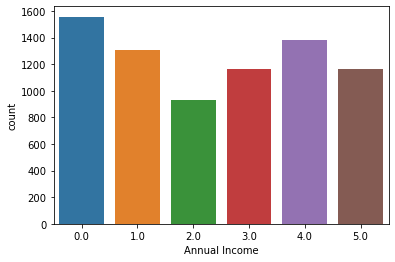

In [22]:
sns.countplot(x="Annual Income", data=df)
plt.show()

### Years in current job - количество лет на текущем месте работы <a name="3_yicj"></a>

`преобразуем в категории. пропуски выделяем в отдельную категорию`

[к оглавлению](#index)

In [23]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

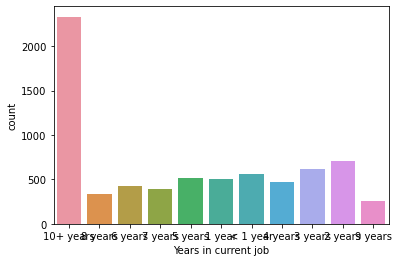

In [24]:
sns.countplot(x="Years in current job", data=df)
plt.show()

In [25]:
df_test['Years in current job'].value_counts()

10+ years    810
3 years      228
2 years      212
< 1 year     207
5 years      169
1 year       153
4 years      152
7 years      140
6 years      137
8 years      107
9 years       99
Name: Years in current job, dtype: int64

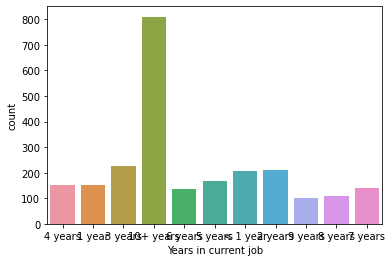

In [26]:
sns.countplot(x="Years in current job", data=df_test)
plt.show()

In [27]:
df['Years in current job'] = df['Years in current job'].map({
                                                            '10+ years':'10', 
                                                            '9 years':'9',
                                                            '8 years':'8',
                                                            '7 years':'7',
                                                            '6 years':'6',
                                                            '5 years':'5',
                                                            '4 years':'4',
                                                            '3 years':'3',
                                                            '2 years':'2',
                                                            '1 year':'1',
                                                            '< 1 year':'0'
                                                            }).astype(float)

df.loc[df['Years in current job'].isnull(), 'Years in current job'] = 11

# на ТЕСТЕ

df_test['Years in current job'] = df_test['Years in current job'].map({
                                                            '10+ years':'10', 
                                                            '9 years':'9',
                                                            '8 years':'8',
                                                            '7 years':'7',
                                                            '6 years':'6',
                                                            '5 years':'5',
                                                            '4 years':'4',
                                                            '3 years':'3',
                                                            '2 years':'2',
                                                            '1 year':'1',
                                                            '< 1 year':'0'
                                                            }).astype(float)

df_test.loc[df_test['Years in current job'].isnull(), 'Years in current job'] = 11

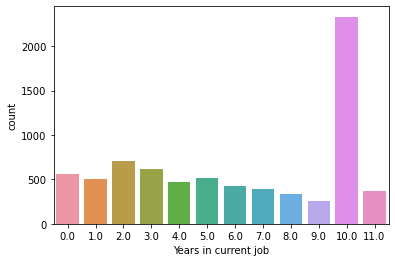

In [28]:
sns.countplot(x="Years in current job", data=df)
plt.show()

### Tax Liens - налоговые обременения <a name="4_tl"></a>

`как вариант - поделить признак на две части: 0 - нет обременений и 1 - обременения есть`

[к оглавлению](#index)

In [29]:
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

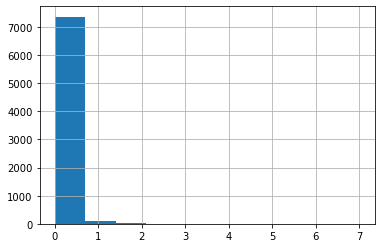

In [30]:
df['Tax Liens'].hist()

In [31]:
df.loc[(df['Tax Liens'] > 0), 'Tax Liens'] = 1

# на ТЕСТЕ

df_test.loc[(df_test['Tax Liens'] > 0), 'Tax Liens'] = 1

In [32]:
df['Tax Liens'].value_counts()

0.0    7366
1.0     134
Name: Tax Liens, dtype: int64

In [33]:
# df_test['Tax Liens'].value_counts()

### Number of Open Accounts - количество открытых счетов <a name="5_nooa"></a>

` пока незнаю что делать. у распределение этого параметра очень большой "хвост" справа, но если заменить на среднюю/медиану или что-то такое, то вид распределения сильно меняется`

[к оглавлению](#index)

In [34]:
df['Number of Open Accounts'].value_counts()

9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
32.0      6
33.0      6
31.0      6
34.0      2
37.0      2
43.0      1
35.0      1
41.0      1
38.0      1
42.0      1
Name: Number of Open Accounts, dtype: int64

In [35]:
df['Number of Open Accounts'].describe()

count    7500.000000
mean       11.130933
std         4.908924
min         2.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        43.000000
Name: Number of Open Accounts, dtype: float64

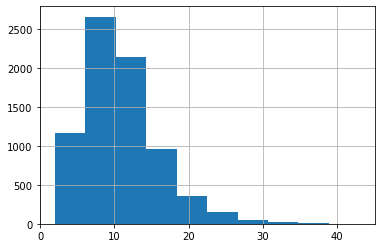

In [36]:
df['Number of Open Accounts'].hist()

In [37]:
# df.loc[(df['Number of Open Accounts'] > 14), 'Number of Open Accounts'] = df['Number of Open Accounts'].mean()

In [38]:
# df['Number of Open Accounts'].hist()

### Years of Credit History - коичество лет кредитной истории <a name="6_yoch"></a>

`заменил значения больше 40 на 40.`

[к оглавлению](#index)

In [39]:
df['Years of Credit History'].value_counts()

15.0    104
16.0     99
16.5     91
17.0     86
17.5     83
       ... 
43.2      1
4.9       1
39.5      1
42.4      1
39.8      1
Name: Years of Credit History, Length: 408, dtype: int64

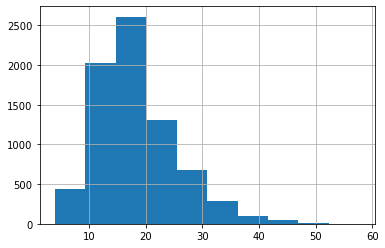

In [40]:
df['Years of Credit History'].hist()

In [41]:
df.loc[(df['Years of Credit History'] > 40), 'Years of Credit History'] = 40

# на ТЕСТЕ
df_test.loc[(df_test['Years of Credit History'] > 40), 'Years of Credit History'] = 40

In [42]:
# (df['Years of Credit History'] == 0).value_counts()

### Maximum Open Credit - наибольший открытый кредит

` преобразовал в 5 категорий в зависимости от суммы наибольшего кредита`

[к оглавлению](#index)

In [43]:
df['Maximum Open Credit'].value_counts()

0.0          65
319110.0      5
334796.0      3
607046.0      3
294030.0      3
             ..
534600.0      1
1026124.0     1
77066.0       1
780164.0      1
350768.0      1
Name: Maximum Open Credit, Length: 6963, dtype: int64

In [44]:
df['Maximum Open Credit'].describe()

count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

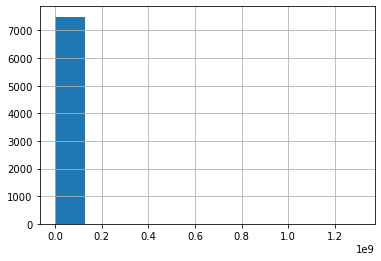

In [45]:
df['Maximum Open Credit'].hist()

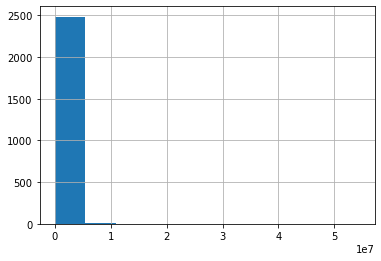

In [46]:
df_test['Maximum Open Credit'].hist()

In [47]:
df.loc[(df['Maximum Open Credit'] < 200000), 'Maximum Open Credit'] = 0
df.loc[(df['Maximum Open Credit'] >= 200000) & (df['Maximum Open Credit'] < 400000), 'Maximum Open Credit'] = 1
df.loc[(df['Maximum Open Credit'] >= 400000) & (df['Maximum Open Credit'] < 600000), 'Maximum Open Credit'] = 2
df.loc[(df['Maximum Open Credit'] >= 600000) & (df['Maximum Open Credit'] < 800000), 'Maximum Open Credit'] = 3
df.loc[(df['Maximum Open Credit'] >= 800000) & (df['Maximum Open Credit'] < 1000000), 'Maximum Open Credit'] = 4
df.loc[(df['Maximum Open Credit'] >= 1000000), 'Maximum Open Credit'] = 5


# на ТЕСТЕ
df_test.loc[(df_test['Maximum Open Credit'] < 200000), 'Maximum Open Credit'] = 0
df_test.loc[(df_test['Maximum Open Credit'] >= 200000) & (df_test['Maximum Open Credit'] < 400000), 'Maximum Open Credit'] = 1
df_test.loc[(df_test['Maximum Open Credit'] >= 400000) & (df_test['Maximum Open Credit'] < 600000), 'Maximum Open Credit'] = 2
df_test.loc[(df_test['Maximum Open Credit'] >= 600000) & (df_test['Maximum Open Credit'] < 800000), 'Maximum Open Credit'] = 3
df_test.loc[(df_test['Maximum Open Credit'] >= 800000) & (df_test['Maximum Open Credit'] < 1000000), 'Maximum Open Credit'] = 4
df_test.loc[(df_test['Maximum Open Credit'] >= 1000000), 'Maximum Open Credit'] = 5

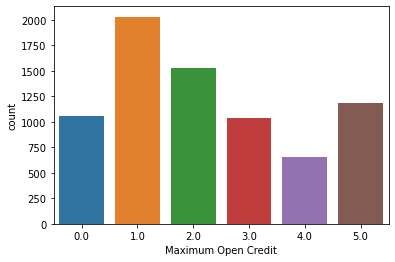

In [48]:
sns.countplot(x="Maximum Open Credit", data=df)
plt.show()

In [49]:
# sns.countplot(x="Maximum Open Credit", data=df_test)
# plt.show()

### Number of Credit Problems - количество проблем с кредитом

` может поделить на 2 категории: есть или нет проблем с кредитом...`

[к оглавлению](#index)

In [50]:
df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

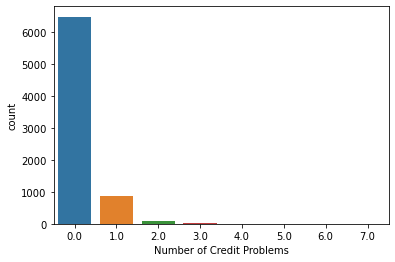

In [51]:
sns.countplot(x="Number of Credit Problems", data=df)
plt.show()

In [52]:
df.loc[(df['Number of Credit Problems'] > 0), 'Number of Credit Problems'] = 1

# на ТЕСТЕ
df_test.loc[(df_test['Number of Credit Problems'] > 0), 'Number of Credit Problems'] = 1

### Months since last delinquent - количество месяцев с последней просрочки кредита <a name=9_msld>

`очень много пропусков! пока все данные поделил на 4 категории, плюс все пропуски выделил в отдельную категорию`

[к оглавлению](#index)

In [53]:
df['Months since last delinquent'].value_counts()

14.0     76
29.0     71
8.0      68
33.0     68
13.0     65
         ..
86.0      1
92.0      1
118.0     1
84.0      1
91.0      1
Name: Months since last delinquent, Length: 89, dtype: int64

In [54]:
# df_test['Months since last delinquent'].value_counts()

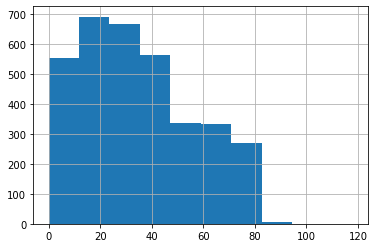

In [55]:
df['Months since last delinquent'].hist()

In [56]:
df.loc[(df['Months since last delinquent'] == 0) & (df['Months since last delinquent'] < 3), 'Months since last delinquent'] = 1
df.loc[(df['Months since last delinquent'] >= 3) & (df['Months since last delinquent'] < 6), 'Months since last delinquent'] = 2
df.loc[(df['Months since last delinquent'] >= 6) & (df['Months since last delinquent'] < 12), 'Months since last delinquent'] = 3
df.loc[(df['Months since last delinquent'] >= 12), 'Months since last delinquent'] = 4

df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

# на ТЕСТЕ
df_test.loc[(df_test['Months since last delinquent'] == 0) & (df_test['Months since last delinquent'] < 3), 'Months since last delinquent'] = 1
df_test.loc[(df_test['Months since last delinquent'] >= 3) & (df_test['Months since last delinquent'] < 6), 'Months since last delinquent'] = 2
df_test.loc[(df_test['Months since last delinquent'] >= 6) & (df_test['Months since last delinquent'] < 12), 'Months since last delinquent'] = 3
df_test.loc[(df_test['Months since last delinquent'] >= 12), 'Months since last delinquent'] = 4

df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

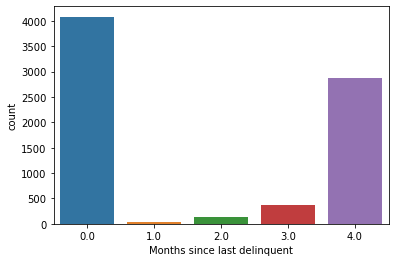

In [57]:
# df['Months since last delinquent'].hist()
sns.countplot(x="Months since last delinquent", data=df)
plt.show()

### Bankruptcies - банкротства

`пропуски можно заменить 0. предположение что при отсутствии банкротств данную категорию иногда просто не заполняли
остальные данные поделил на две категории: 0 - нет банкротств, 1 - есть банскотства`

[к оглавлению](#index)

In [58]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

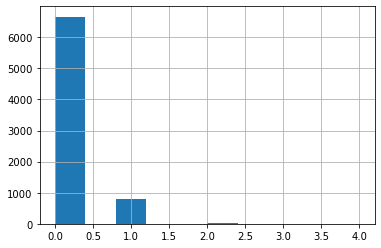

In [59]:
df['Bankruptcies'].hist()

In [60]:
df.loc[df['Bankruptcies'].isnull(), 'Bankruptcies'] = 1
df.loc[(df['Bankruptcies'] > 0), 'Bankruptcies'] = 1

# на ТЕСТЕ
df_test.loc[df_test['Bankruptcies'].isnull(), 'Bankruptcies'] = 1
df_test.loc[(df_test['Bankruptcies'] > 0), 'Bankruptcies'] = 1

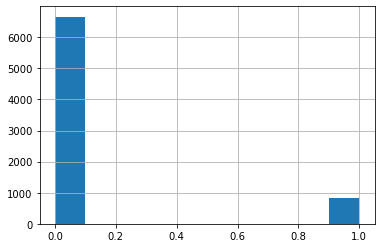

In [61]:
df['Bankruptcies'].hist()

### Purpose - цель кредита <a name=11_p>

`преобразуем в dummies`

[к оглавлению](#index)

In [62]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [63]:
df_test['Purpose'].value_counts()

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
vacation                   3
educational expenses       3
wedding                    2
moving                     1
Name: Purpose, dtype: int64

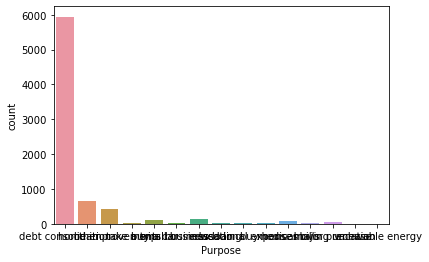

In [64]:
sns.countplot(x="Purpose", data=df)
plt.show()

In [65]:
df = pd.concat([df, pd.get_dummies(df['Purpose'], prefix='Purpose')], axis=1)
# df = df.drop('Purpose', 1)

# на ТЕСТЕ
df_test = pd.concat([df_test, pd.get_dummies(df_test['Purpose'], prefix='Purpose')], axis=1)

### Term - срок кредита - срок кредита <a name=12_t>

[к оглавлению](#index)

In [66]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

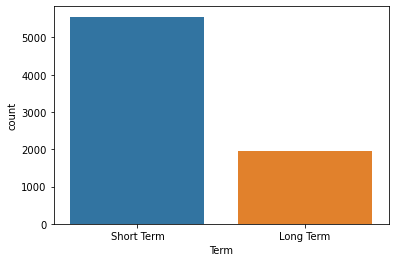

In [67]:
sns.countplot(x="Term", data=df)
plt.show()

In [68]:
df['Term'] = df['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(int)

# на ТЕСТЕ
df_test['Term'] = df_test['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(int)

In [69]:
df['Term'].value_counts()

1    5556
0    1944
Name: Term, dtype: int64

### Current Loan Amount - текущая сумма кредита

`смущает 870 сильно больших значений. их много, чтобы на что-то менять.
пока поделю все на 5 категорий в зависимости от величины суммы, а 870 больших выбросов выделю в отдельную категорию`

[к оглавлению](#index)

In [70]:
df['Current Loan Amount'].value_counts()

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

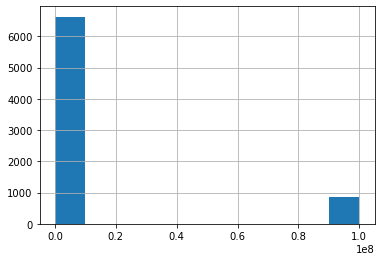

In [71]:
df['Current Loan Amount'].hist()

In [72]:
df.loc[(df['Current Loan Amount'] == 99999999), 'Current Loan Amount'] = 0

df.loc[(df['Current Loan Amount'] > 1) & (df['Current Loan Amount'] < 200000), 'Current Loan Amount'] = 1
df.loc[(df['Current Loan Amount'] >= 200000) & (df['Current Loan Amount'] < 350000), 'Current Loan Amount'] = 2
df.loc[(df['Current Loan Amount'] >= 350000) & (df['Current Loan Amount'] < 450000), 'Current Loan Amount'] = 3
df.loc[(df['Current Loan Amount'] >= 450000), 'Current Loan Amount'] = 4

# на ТЕСТЕ
df_test.loc[(df_test['Current Loan Amount'] == 99999999), 'Current Loan Amount'] = 0

df_test.loc[(df_test['Current Loan Amount'] > 1) & (df_test['Current Loan Amount'] < 200000), 'Current Loan Amount'] = 1
df_test.loc[(df_test['Current Loan Amount'] >= 200000) & (df_test['Current Loan Amount'] < 350000), 'Current Loan Amount'] = 2
df_test.loc[(df_test['Current Loan Amount'] >= 350000) & (df_test['Current Loan Amount'] < 450000), 'Current Loan Amount'] = 3
df_test.loc[(df_test['Current Loan Amount'] >= 450000), 'Current Loan Amount'] = 4


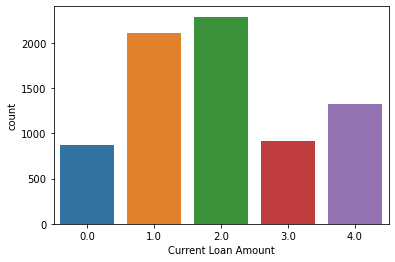

In [73]:
sns.countplot(x="Current Loan Amount", data=df)
plt.show()

### Current Credit Balance - текущий кредитный баланс

`пока тоже поделю на категории...`

[к оглавлению](#index)

In [74]:
df['Current Credit Balance'].value_counts()

0.0         53
191710.0     5
53580.0      4
106818.0     4
155059.0     4
            ..
229672.0     1
349467.0     1
116223.0     1
797240.0     1
189905.0     1
Name: Current Credit Balance, Length: 6592, dtype: int64

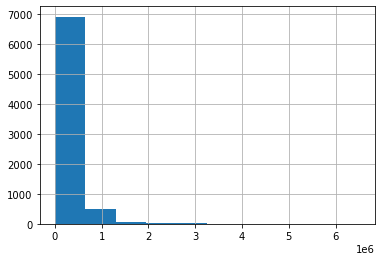

In [75]:
df['Current Credit Balance'].hist()

In [76]:
df.loc[(df['Current Credit Balance'] < 100000), 'Current Credit Balance'] = 0
df.loc[(df['Current Credit Balance'] >= 100000) & (df['Current Credit Balance'] < 200000), 'Current Credit Balance'] = 1
df.loc[(df['Current Credit Balance'] >= 200000) & (df['Current Credit Balance'] < 300000), 'Current Credit Balance'] = 2
df.loc[(df['Current Credit Balance'] >= 300000) & (df['Current Credit Balance'] < 500000), 'Current Credit Balance'] = 3
df.loc[(df['Current Credit Balance'] >= 500000), 'Current Credit Balance'] = 5

# на ТЕСТЕ
df_test.loc[(df_test['Current Credit Balance'] < 100000), 'Current Credit Balance'] = 0
df_test.loc[(df_test['Current Credit Balance'] >= 100000) & (df_test['Current Credit Balance'] < 200000), 'Current Credit Balance'] = 1
df_test.loc[(df_test['Current Credit Balance'] >= 200000) & (df_test['Current Credit Balance'] < 300000), 'Current Credit Balance'] = 2
df_test.loc[(df_test['Current Credit Balance'] >= 300000) & (df_test['Current Credit Balance'] < 500000), 'Current Credit Balance'] = 3
df_test.loc[(df_test['Current Credit Balance'] >= 500000), 'Current Credit Balance'] = 5


In [77]:
df['Current Credit Balance'].value_counts()

1.0    2038
0.0    1568
2.0    1416
3.0    1412
5.0    1066
Name: Current Credit Balance, dtype: int64

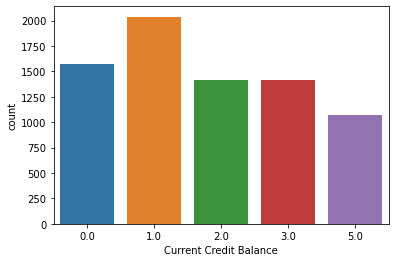

In [78]:
sns.countplot(x="Current Credit Balance", data=df)
plt.show()

### Monthly Debt - ежемесячный долг

`пока поделю по на категории`

[к оглавлению](#index)

In [79]:
df['Monthly Debt'].value_counts()

0.0        6
19222.0    4
19667.0    4
9525.0     3
22364.0    3
          ..
12897.0    1
27541.0    1
23227.0    1
55957.0    1
17.0       1
Name: Monthly Debt, Length: 6716, dtype: int64

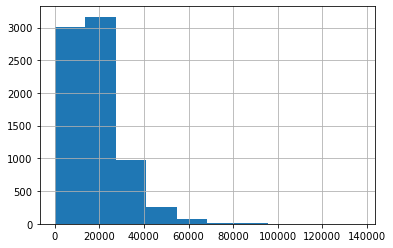

In [80]:
df['Monthly Debt'].hist()

In [81]:
df.loc[(df['Monthly Debt'] < 10000), 'Monthly Debt'] = 0
df.loc[(df['Monthly Debt'] >= 10000) & (df['Monthly Debt'] < 20000), 'Monthly Debt'] = 1
df.loc[(df['Monthly Debt'] >= 20000) & (df['Monthly Debt'] < 30000), 'Monthly Debt'] = 2
df.loc[(df['Monthly Debt'] >= 30000), 'Monthly Debt'] = 3

# на ТЕСТЕ
df_test.loc[(df_test['Monthly Debt'] < 10000), 'Monthly Debt'] = 0
df_test.loc[(df_test['Monthly Debt'] >= 10000) & (df_test['Monthly Debt'] < 20000), 'Monthly Debt'] = 1
df_test.loc[(df_test['Monthly Debt'] >= 20000) & (df_test['Monthly Debt'] < 30000), 'Monthly Debt'] = 2
df_test.loc[(df_test['Monthly Debt'] >= 30000), 'Monthly Debt'] = 3

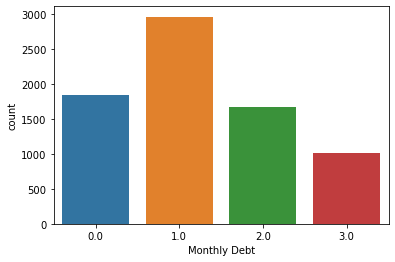

In [82]:
sns.countplot(x="Monthly Debt", data=df)
plt.show()

### Credit Score - кредитный рейтинг

`разделил на категории согласно описанию:
https://ru.wikipedia.org/wiki/Кредитный_скоринг
незаполненные значения выделил с отдельную категорию...`

[к оглавлению](#index)

In [83]:
df['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

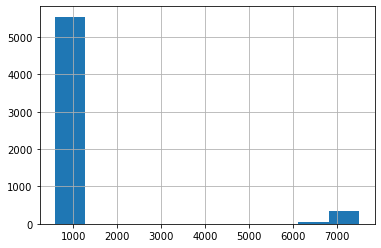

In [84]:
df['Credit Score'].hist()

In [85]:
df.loc[(df['Credit Score'] < 700), 'Credit Score'] = 1
df.loc[(df['Credit Score'] >= 700) & (df['Credit Score'] < 720), 'Credit Score'] = 2
df.loc[(df['Credit Score'] >= 720) & (df['Credit Score'] < 740), 'Credit Score'] = 3
df.loc[(df['Credit Score'] >= 740) & (df['Credit Score'] < 750), 'Credit Score'] = 4
df.loc[(df['Credit Score'] >= 750) & (df['Credit Score'] <= 790), 'Credit Score'] = 5
df.loc[(df['Credit Score'] > 790), 'Credit Score'] = 6

df.loc[df['Credit Score'].isnull(), 'Credit Score'] = 0

# на ТЕСТЕ
df_test.loc[(df_test['Credit Score'] < 700), 'Credit Score'] = 1
df_test.loc[(df_test['Credit Score'] >= 700) & (df_test['Credit Score'] < 720), 'Credit Score'] = 2
df_test.loc[(df_test['Credit Score'] >= 720) & (df_test['Credit Score'] < 740), 'Credit Score'] = 3
df_test.loc[(df_test['Credit Score'] >= 740) & (df_test['Credit Score'] < 750), 'Credit Score'] = 4
df_test.loc[(df_test['Credit Score'] >= 750) & (df_test['Credit Score'] <= 790), 'Credit Score'] = 5
df_test.loc[(df_test['Credit Score'] > 790), 'Credit Score'] = 6

df_test.loc[df_test['Credit Score'].isnull(), 'Credit Score'] = 0

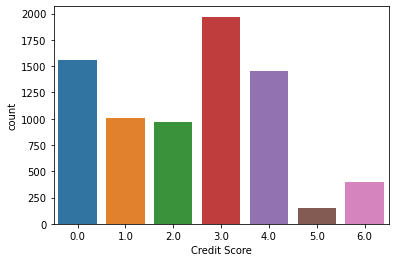

In [86]:
sns.countplot(x="Credit Score", data=df)
plt.show()

In [87]:
df['Credit Score'].value_counts()

3.0    1970
0.0    1557
4.0    1449
1.0    1002
2.0     968
6.0     400
5.0     154
Name: Credit Score, dtype: int64

## Обзор целевой переменной. Credit Default

*видим, что значений 0 сильно больше, чем значений 1. это может стать проблемой...*

[к оглавлению](#index)

In [88]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

## Смотрим, что получилось

In [89]:
# len(df) - df.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   int32  
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

## Меняем float на str, чтобы категории шли как категории

In [90]:
for colname in [
    'Annual Income', 
    'Years in current job', 
    'Tax Liens', 
    'Number of Open Accounts', 
    'Years of Credit History', 
    'Maximum Open Credit', 
    'Number of Credit Problems', 
    'Months since last delinquent', 
    'Bankruptcies',
    'Term',
    'Current Loan Amount',
    'Current Credit Balance',
    'Monthly Debt',
    'Credit Score'
]:
    df[colname] = df[colname].astype(str)
    df_test[colname] = df_test[colname].astype(str)
    

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Home Ownership                7500 non-null   object
 1   Annual Income                 7500 non-null   object
 2   Years in current job          7500 non-null   object
 3   Tax Liens                     7500 non-null   object
 4   Number of Open Accounts       7500 non-null   object
 5   Years of Credit History       7500 non-null   object
 6   Maximum Open Credit           7500 non-null   object
 7   Number of Credit Problems     7500 non-null   object
 8   Months since last delinquent  7500 non-null   object
 9   Bankruptcies                  7500 non-null   object
 10  Purpose                       7500 non-null   object
 11  Term                          7500 non-null   object
 12  Current Loan Amount           7500 non-null   object
 13  Current Credit Bal

In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Home Ownership                2500 non-null   object
 1   Annual Income                 2500 non-null   object
 2   Years in current job          2500 non-null   object
 3   Tax Liens                     2500 non-null   object
 4   Number of Open Accounts       2500 non-null   object
 5   Years of Credit History       2500 non-null   object
 6   Maximum Open Credit           2500 non-null   object
 7   Number of Credit Problems     2500 non-null   object
 8   Months since last delinquent  2500 non-null   object
 9   Bankruptcies                  2500 non-null   object
 10  Purpose                       2500 non-null   object
 11  Term                          2500 non-null   object
 12  Current Loan Amount           2500 non-null   object
 13  Current Credit Bal

## Обучение на моделях

In [93]:
COL_SELECTED = [
#         'Home Ownership',
        'Annual Income',
        'Years in current job',
        'Tax Liens',
        'Number of Open Accounts',
        'Years of Credit History',
        'Maximum Open Credit',
        'Number of Credit Problems',
        'Months since last delinquent',
        'Bankruptcies',
#         'Purpose',
        'Term',
        'Current Loan Amount',
        'Current Credit Balance',
        'Monthly Debt',
        'Credit Score',
        'Home Ownership_Have Mortgage',
        'Home Ownership_Home Mortgage',
        'Home Ownership_Own Home',
        'Home Ownership_Rent',
        'Purpose_business loan',
        'Purpose_buy a car',
        'Purpose_buy house',
        'Purpose_debt consolidation',
        'Purpose_educational expenses',
        'Purpose_home improvements',
        'Purpose_major purchase',
        'Purpose_medical bills',
        'Purpose_moving',
        'Purpose_other',
#         'Purpose_renewable energy',
        'Purpose_small business',
        'Purpose_take a trip',
        'Purpose_vacation',
        'Purpose_wedding'
                         ]

In [94]:
X = df[COL_SELECTED]
y = df['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

In [101]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f1_score(y_test, y_test_pred))

0.41318681318681316


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
# df_test['ID'] = df_test.index.tolist()

In [106]:
# df_test["Credit Default"] = model.predict(df_test[COL_SELECTED])

In [98]:
# df_test.loc[:, ['ID','Credit Default']].to_csv('pSS.csv', index=False)

In [787]:
# df_ = pd.read_csv('pSS.csv')